# Verificador Entregas
 
1. Poner una celda de markdown por carpeta (extraer nombre)
2. Luego copiar contenido de cada archivo .py en una celda de código.
3. Crea un cuaderno general con todas las entregas, y uno individual para retroalimentación del estudiante

## Uso

Copiar este cuaderno en la raiz de la carpeta donde se descomprimió la entrega en Aula Digital, luego ejecutarlo todo.


In [1]:
%reset -sf

extensions = [
    '.py',
    'otra_ext'
]

evaluacion = "Taller Condicionales"
enunciado = '''
Deberá escribir un programa (archivo) por cada item solicitado a continuación:

1. Escriba un programa que reciba un número entero de 2 dígitos, y un operador (+, -, *, /).

- El programa debe entregar la operación seleccionada entre el primer y segundo dígito.

- Debe evitar errores de entrada de usuario y división por cero.

2. Escriba un programa que reciba la edad de una persona, y entregue su clasificación según el ciclo de vida definido por MinSalud:

Primera Infancia (0-5 años)
Infancia (6 - 11 años)
Adolescencia (12 - 18 años)
Juventud (19 - 26 años)
Adultez (27- 59 años)
Persona Mayor (60 años o mas) envejecimiento y vejez

- Use estructuras try/except para evitar que el programa arroje errores por mal entrada de usuario.

3. Escriba un programa que reciba tres números e indique cuál es el mayor

- Use estructuras try/except para evitar que el programa arroje errores por mal entrada de usuario.


'''

import os
from pathlib import Path

import tkinter as tk
from  tkinter import filedialog

root = tk.Tk()
root.withdraw()

''

## Procesar carpeta con archivos comprimidos o con carpetas descomprimidas

Requiere: 
- una carpeta con los .zip generados por Aula Digital
    - Con esta opción, descomprime los .zip y genera carpetas con consecutivos
o
- una carpeta con las subcarpetas de las evaluaciones.
    - Con esta opción, solo identifica las subcarpetas
    
El resultado es la lista ```basepaths```

In [4]:
rootpath = Path(filedialog.askdirectory())
# rootpath = Path(r"C:\Users\000092114\UPB\Fundamentos de Computacion 2022-20 - Profesores - Profesores\_notas\seg1\Test")
basepaths = []
content = rootpath.glob('*/')
contList = [Path(x) for x in content]
folders = [x for x in contList if x.is_dir()]
files = [x for x in contList if x.is_file() and x.suffix == ".zip"]
# print(folders)
# print(files)
generateNB = False
if folders == [] and files != []: # si no se ha descomprimido nada y hay .zips por descomprimir
    from zipfile import ZipFile
    grupo = 1
    # ahora se define el nombre de la carpeta con un consecutivo.
    for file in files:
        # Create a ZipFile Object and load sample.zip in it
        with ZipFile(str(file), 'r') as zipObj:
           # Extract all the contents of zip file in different directory
            zipObj.extractall(file.parent/str(grupo))
            generateNB = True
        basepaths.append(file.parent/str(grupo))
        grupo += 1
elif folders != []:
    basepaths = folders
    
print(basepaths)

[WindowsPath('C:/Users/LMAG/UPB/Fundamentos de Computacion 2022-20 - Profesores - Profesores/_notas/seg1/S03_condicionales/1')]


## Procesar los archivos

In [7]:
pathList,nameList,scriptList = list(),list(),list()
for basepath in basepaths:
    for entry in os.listdir(basepath):
        entry = Path(entry)
        if str(entry).endswith("_assignsubmission_file_"):
            #agregue el path de la carpeta a la lista de paths
            pathList.append(basepath/entry)
            #agregue el nombre a la lista de nombres (extraido del nombre de la entrega)
            nameList.append(str(entry).split("_")[0])
            #recoja todos los archivos de cada entrega
            p = pathList[-1].glob("**/*")
            #solo guarde los que estén en la lista de extensiones (para evitar que coja los cuadernos)
            scriptList.append([x for x in p if x.is_file() and x.suffix in extensions])
    

In [8]:
for pat,nam,scr in zip(pathList,nameList,scriptList):
    print(nam)
    print(scr)
    print(pat)
    if scr == []:
        print(f"Error de archivos con {nam}, no se encontraron archivos para revisar en {pat}")
    # leer el contenido del archivo como texto
    #print(scriptList[-1][-1].read_text())

Cañizares Garces Paola Andrea
[WindowsPath('C:/Users/LMAG/UPB/Fundamentos de Computacion 2022-20 - Profesores - Profesores/_notas/seg1/S03_condicionales/1/Cañizares Garces Paola Andrea_2890790_assignsubmission_file_/Codigo_1.py'), WindowsPath('C:/Users/LMAG/UPB/Fundamentos de Computacion 2022-20 - Profesores - Profesores/_notas/seg1/S03_condicionales/1/Cañizares Garces Paola Andrea_2890790_assignsubmission_file_/Codigo_2.py'), WindowsPath('C:/Users/LMAG/UPB/Fundamentos de Computacion 2022-20 - Profesores - Profesores/_notas/seg1/S03_condicionales/1/Cañizares Garces Paola Andrea_2890790_assignsubmission_file_/Codigo_3.py')]
C:\Users\LMAG\UPB\Fundamentos de Computacion 2022-20 - Profesores - Profesores\_notas\seg1\S03_condicionales\1\Cañizares Garces Paola Andrea_2890790_assignsubmission_file_
Gaviria Usuga Maria Clara
[WindowsPath('C:/Users/LMAG/UPB/Fundamentos de Computacion 2022-20 - Profesores - Profesores/_notas/seg1/S03_condicionales/1/Gaviria Usuga Maria Clara_2890787_assignsubmis

## Creación de cuadernos individuales por estudiante con el reporte

### Importar módulos y definición de funciones

**Atención**: solo correr si se requiere generar los cuadernos de retroalimentación.

In [9]:
if generateNB:

    import nbformat as nbf
    import itertools 

    def conformarCeldas(cuaderno,nombre,scripts):
        cellsList = list()
        text = f"""\
# {nombre}
# {evaluacion}
# {enunciado}
"""
        cellsList.append(nbf.v4.new_markdown_cell(text))
        code = f"""\
%%javascript
IPython.notebook.events.off('checkpoint_created.Notebook');
IPython.notebook.events.off('notebook_saved.Notebook');
"""
        cellsList.append(nbf.v4.new_code_cell(code))

        for script in scripts:
            try:
                codeText = script.read_text(encoding="utf8")
            except:
                print(f"fallo lectura de codigo en {script}")
                return cellsList
            code = f"""\
# {script.stem}\n
%reset -sf\n#para correr el script desde cero, esta linea no afectara la ejecución de su codigo.\n
{codeText}"""
            cellsList.append(nbf.v4.new_code_cell(code))
        return cellsList

### Crear cuadernos con script por celda de código

Se pone el nombre del estudiante en una celda de markdown
Luego se crea una celda de código por programa, con un comentario con el nombre del archivo.

In [10]:
if generateNB:

    for (estPath,estName,estScripts) in zip(pathList,nameList,scriptList):

        nb = nbf.v4.new_notebook()

        celdas = conformarCeldas(nb,estName,estScripts)

        nb['cells'] = celdas
        nbf.write(nb, estPath/f'{estName}.ipynb')

### Verificar similaridad

Correr estas celdas individualmente.
1. Conformar la lista de scripts y estudiantes consolidada
2. correr la celda para generar el mapa de similaridad

In [11]:
# generar mapa de similaridad
from difflib import SequenceMatcher
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import re


def stripComments(code):
    code = str(code)
    return re.sub(r'(?m)^ *#.*\n?', '', code)
def stripLines(code,lines):
    return ''.join(code.splitlines())[lines:]

In [13]:
try:
    print(umbral,'%')
    print(similarStdev,'%')
except:
    umbral = 90 #porcentaje de similitud

dimension = len(scriptList)
similarity = np.zeros((dimension,dimension))
mostSimilar = []
flatSimilar = []
for i,script_base in enumerate(scriptList):
    for j,script_cmp in enumerate(scriptList):
        with open(script_base[0], errors='ignore',encoding='UTF-8') as fileA,open(script_cmp[0], errors='ignore',encoding='UTF-8') as fileB:
            fileAData = fileA.read()
            fileAData = stripComments(fileAData)
            fileBData = fileB.read()
            fileBData = stripComments(fileBData)
            similarity[[i],[j]] = int(SequenceMatcher(None, fileAData,fileBData).ratio()*100)
            if similarity[[i],[j]]>umbral and j>i: #solo tomar a la derecha de la diagonal.
                mostSimilar.append([script_base[0],script_cmp[0],similarity[[i],[j]][0]])
                print( f"{nameList[i]} se asemeja en: {similarity[i][j]:.0f} % a {nameList[j]}.")
            if j>i:
                flatSimilar.append(similarity[[i],[j]][0])

similarStdev = statistics.stdev(flatSimilar)
similarMean = statistics.mean(flatSimilar)
umbral = int(similarMean+(similarStdev*2))
df = pd.DataFrame(similarity, columns = nameList, index = nameList)

22 %
9.121768066612109 %
Hoyos Carmona Santiago se asemeja en: 26 % a Ramirez Zuluaga Tomas.
Salinas Bustamante Maria Alejandra se asemeja en: 86 % a Taborda Martinez Vanessa Andrea.
Tellez Soleiman Said Karam se asemeja en: 39 % a Vallejo Zapata Valeria.


In [9]:
# percSimilar = dict((i,item) for i,item in enumerate(mostSimilar))
# print(percSimilar)    
# print(fileAData)

## Por hacer

Generar una lista de parejas de personas con similaridad mayor a cierto umbral, luego llamar al comparador con interfaz gráfica: https://github.com/yebrahim/pydiff

- Generar parejas de similares con mayor a umbral
- Verificar uso de la herramienta llamada desde cli.
- Sistematizar la revisión de comparación

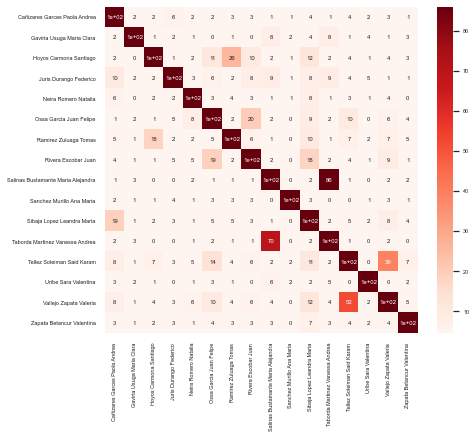

In [14]:
# print(df)
sns.set(font_scale=0.5)
sns.set_palette("coolwarm")
figure = plt.gcf() # get current figure
figure.set_size_inches(7, 6)
mapa = sns.heatmap(df, annot=True, vmin = similarMean, vmax = max(flatSimilar),cmap = "Reds")
plt.savefig(rootpath/'mapaSimilaridad.pdf', dpi=300,bbox_inches='tight')

#### Pendientes mapa de calor

convertir en mapa de calor diagonal, seleccionar el máximo y hacer la gráfica como se indica aquí:
https://seaborn.pydata.org/examples/many_pairwise_correlations.html

### Crear un cuaderno con todos los códigos para comparación y verificación de fraudes

In [15]:
import subprocess

for similar in mostSimilar:
    path1 = str(similar[0])
    path2 = str(similar[1])
    command = f'python pydiff.py -p "{path1}" "{path2}"'
#     print(command)
    try:
        subprocess.call(command, timeout = 1, shell=True)
    except:
        pass
#   os.system(command)
# nb = nbf.v4.new_notebook()
# for (estPath,estName,estScripts) in zip(pathList,nameList,scriptList):
#     celdas = conformarCeldas(nb,estName,estScripts)
    
#     nb['cells'] += celdas
# nbf.write(nb, 'RevisionEntregas.ipynb')

### Refs

https://nbviewer.org/gist/fperez/9716279

https://github.com/yebrahim/pydiff